### Import

In [52]:
import os
import numpy as np
import pandas as pd

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from matplotlib import pyplot as plt
import seaborn as sns

import math
from math import log

### Load data

In [53]:
x_tr_original = np.loadtxt('./data_sneaker_vs_sandal/x_train.csv', delimiter=',', skiprows=1)
x_te_original = np.loadtxt('./data_sneaker_vs_sandal/x_test.csv', delimiter=',', skiprows=1)

y_tr = np.loadtxt('./data_sneaker_vs_sandal/y_train.csv', delimiter=',', skiprows=1)

In [54]:
def train_model(X, Y, c=1.0):
    clf = sklearn.linear_model.LogisticRegression(solver='liblinear',C=c).fit(X, Y)
    
    return clf

def auto_train(X, Y, test_x, file_name, c=1.0, cover=0):
    clf = train_model(X, Y, c)
    yproba1_train = clf.predict_proba(X)[:,1]
    yproba1_test = clf.predict_proba(test_x)[:, 1]
    np.savetxt(file_name, yproba1_test)
    if cover==1:
        np.savetxt('yproba1_test.txt', yproba1_test)
    return [yproba1_train, clf.coef_[0]]

### 01Normalization

In [55]:
def make_0_1(x):
    f_max = x.shape[1]
    row_max = x.shape[0]
    
    for f_index in list(range(f_max)):
        for row_index in list(range(row_max)):
            if x[row_index][f_index] > 0:
                x[row_index][f_index] = 1
                #print(x[row_index][f_index])
    return x

In [56]:
x_tr_01 = make_0_1(x_tr_original.copy())
x_te_01 = make_0_1(x_te_original.copy())

x_tr_all = [x_tr_original, x_tr_01]
x_te_all = [x_te_original, x_te_01]

name_all = ["original", "01"]

### Scalar Normalization

In [57]:
scaler = StandardScaler(with_std = False) #with_std=False is kernel center, which performs better 
scaler.fit(x_tr_original)
x_tr_scaler = scaler.transform(x_tr_original)
x_te_scaler = scaler.fit_transform(x_te_original)

### Squre Data

In [58]:
x_tr_sqr = x_tr_original.copy()
x_te_sqr = x_te_original.copy()

x_tr_01_sqr = x_tr_original.copy()
x_te_01_sqr = x_te_original.copy()

#print(len(x_tr_sqr[0]))

In [59]:
def add_sqr(x):
    l = len(x[0])
    print("original length = ", l)
    sqrs = []
    for f_index in list(range(l)):
        new_sqr = []
        
        for row in x:
            new_sqr.append(row[f_index]**2)
        
        sqrs.append(new_sqr)
    
    sqrs = np.array(sqrs)
    sqrs = sqrs.T
    print("add length = ", len(sqrs[0]))
          
    return sqrs

In [60]:
# original
x_tr_sqr_add = add_sqr(x_tr_sqr)
x_tr_sqr_all = np.c_[x_tr_sqr,x_tr_sqr_add]

x_te_sqr_add = add_sqr(x_te_sqr)
x_te_sqr_all = np.c_[x_te_sqr,x_te_sqr_add]


# 01
x_tr_01_sqr_add = add_sqr(x_tr_01_sqr)
x_tr_01_sqr_all = np.c_[x_tr_01_sqr,x_tr_01_sqr_add]

x_te_01_sqr_add = add_sqr(x_te_01_sqr)
x_te_01_sqr_all = np.c_[x_te_01_sqr,x_te_01_sqr_add]

original length =  784
add length =  784
original length =  784
add length =  784
original length =  784
add length =  784
original length =  784
add length =  784


In [61]:
print(len(x_tr_sqr[0]))
print(len(x_te_sqr[0]))
print(len(x_tr_sqr_all[0]))
print(len(x_te_sqr_all[0]))
print(len(x_te_sqr_all))

784
784
1568
1568
2000


In [62]:
predict_train_sqr, coef_sqr = auto_train(x_tr_sqr_all, y_tr, x_te_sqr_all, 'yproba1_test_sqr.txt', cover=1);

### Add cubic for every feature

In [63]:
x_tr_cub = x_tr_original.copy()
x_te_cub = x_te_original.copy()

In [64]:
def add_cub(x):
    l = len(x[0])
    print("original length = ", l)
    cubs = []
    for f_index in list(range(l)):
        new_cub = []
        
        for row in x:
            new_cub.append(row[f_index]**3)
        
        cubs.append(new_cub)
    cubs = np.array(cubs)
    cubs = cubs.T
    print("add length = ", len(cubs[0]))
    return cubs

In [65]:
x_tr_cub_add = add_cub(x_tr_cub)
x_te_cub_add = add_cub(x_te_cub)

original length =  784
add length =  784
original length =  784
add length =  784


In [66]:
x_tr_cub_all = np.c_[x_tr_cub, x_tr_sqr_add, x_tr_cub_add]
x_te_cub_all = np.c_[x_te_cub, x_te_sqr_add, x_te_cub_add]

print(len(x_tr_cub_all[0]))

2352


In [67]:
auto_train(x_tr_cub_all, y_tr, x_te_cub_all, 'yproba1_test_cub.txt', cover=1);

In [ ]:
x_tr_scaler = scaler.transform(x_tr_original)
x_te_scaler = scaler.fit_transform(x_te_original)

x_tr_cub_all = np.c_[x_tr_cub, x_tr_sqr_add, x_tr_cub_add]
x_te_cub_all = np.c_[x_te_cub, x_te_sqr_add, x_te_cub_add]
auto_train(x_tr_cub_all, y_tr, x_te_cub_all, 'yproba1_test_cub.txt', cover=1);

### cubic without sqrt

In [68]:
x_tr_cub_without_sqrt = np.c_[x_tr_cub, x_tr_cub_add]
x_te_cub_without_sqrt = np.c_[x_te_cub, x_te_cub_add]
print(len(x_te_cub_without_sqrt[0]))

1568


In [69]:
auto_train(x_tr_cub_without_sqrt, y_tr, x_te_cub_without_sqrt, 'yproba1_test_cub_without_sqrt.txt', cover=1);

### histogram larger than 0

In [70]:
x_tr_his_large = x_tr_original.copy()
x_te_his_large = x_te_original.copy()

In [71]:
def add_his_large(x):
    l = len(x[0])
    
    print("original length = ", l)
    counts = []

        
    for row in list(range(len(x))):
        count = 0
        for f_index in list(range(l)):
            if (x[row][f_index]>0.0):
                count = count+1

        
        counts.append(count)
    counts = np.array(counts)
    counts = counts.T
    
    return counts

In [72]:
x_tr_his_large_add = add_his_large(x_tr_his_large)
x_te_his_large_add = add_his_large(x_te_his_large)

original length =  784
original length =  784


In [73]:
print(x_tr_his_large_add.shape)
print(x_te_his_large_add.shape)

(12000,)
(2000,)


In [74]:
x_tr_his_large = np.c_[x_tr_his_large, x_tr_his_large_add]
x_te_his_large = np.c_[x_te_his_large, x_te_his_large_add]

x_tr_01_his_large = np.c_[x_tr_01, x_tr_his_large_add]
x_te_01_his_large = np.c_[x_te_01, x_te_his_large_add]

In [82]:
predict_train_histogram, coef_histogram = auto_train(x_tr_01_his_large, y_tr, x_te_01_his_large, 'yproba1_test_01_his_large.txt',c=0.5,cover=1)

In [75]:
predict_train_histogram, coef_histogram = auto_train(x_tr_01_his_large, y_tr, x_te_01_his_large, 'yproba1_test_01_his_large.txt', cover=1)
predict_train_histogram, coef_histogram = auto_train(x_tr_his_large, y_tr, x_te_his_large, 'yproba1_test_his_large.txt', cover=1)

### Add local average and max

In [76]:
x_tr_aver_max = x_tr_original.copy()
x_te_aver_max = x_te_original.copy()

x_tr_01_aver_max = x_tr_original.copy()
x_te_01_aver_max = x_te_original.copy()

#print(x_tr_aver.shape[1])
#print(x_te_aver.shape[1])

In [77]:
def add_aver_max(x):
    f_max = x.shape[1]
    row_max = x.shape[0]

    aves = []
    maxs = []
    
    for f_index in list(range(f_max)):
        ave_col = []
        max_col = []
        for row_index in list(range(row_max)):
            count = 1
            sum = x[row_index][f_index]
            aver = 0
            
            # upleft
            if row_index==0 or f_index==0:
                upleft = 0
            else:
                upleft = x[row_index-1][f_index-1]
                count = count + 1
                sum = sum + upleft
                
            # left
            if f_index==0:
                left = 0
            else:
                left = x[row_index][f_index-1]
                count = count + 1
                sum = sum + left
            
            # downleft
            if row_index==row_max-1 or f_index==0:
                downleft = 0
            else:
                downleft = x[row_index+1][f_index-1]
                count = count + 1
                sum = sum + downleft
        
            # upright
            if row_index==0 or f_index==f_max-1:
                upright = 0
            else:
                upright = x[row_index-1][f_index+1]
                count = count + 1
                sum = sum + upright
                
            # right
            if f_index==f_max-1:
                right = 0
            else:
                right = x[row_index][f_index+1]
                count = count + 1
                sum = sum + right
            
            # downright
            if row_index==row_max-1 or f_index==f_max-1:
                downright = 0
            else:
                downright = x[row_index+1][f_index+1]
                count = count + 1
                sum = sum + downright
                
            # up
            if row_index==0:
                up = 0
            else:
                up = x[row_index-1][f_index]
                count = count + 1
                sum = sum + up

            # down
            if row_index==row_max-1:
                down = 0
            else:
                down = x[row_index+1][f_index]
                count = count + 1
                sum = sum + down
            
            ave = sum/count
            max_local = max(upleft, left, downleft, upright, right, downright, up, down)
            
            ave_col.append(ave)
            max_col.append(max_local)
            
        aves.append(ave_col)
        maxs.append(max_col)
    
    aves = np.array(aves)
    maxs = np.array(maxs)
    aves = aves.T
    maxs = maxs.T
    return aves, maxs

In [78]:
# Original data
x_tr_aver_add, x_tr_max_add = add_aver_max(x_tr_aver_max)
x_te_aver_add, x_te_max_add = add_aver_max(x_te_aver_max)

x_tr_aver_all = np.c_[x_tr_aver_max, x_tr_aver_add]
x_te_aver_all = np.c_[x_te_aver_max, x_te_aver_add]
#print(x_te_aver_all.shape[1])

x_tr_max_all = np.c_[x_tr_aver_max, x_tr_max_add]
x_te_max_all = np.c_[x_te_aver_max, x_te_max_add]
#print(x_te_max_all.shape[1])

In [79]:
# 01 Data
x_tr_01_aver_add, x_tr_01_max_add = add_aver_max(x_tr_01_aver_max)
x_te_01_aver_add, x_te_01_max_add = add_aver_max(x_te_01_aver_max)

# average
x_tr_01_aver_all = np.c_[x_tr_01_aver_max, x_tr_01_aver_add]
x_te_01_aver_all = np.c_[x_te_01_aver_max, x_te_01_aver_add]
#print(x_te_aver_all.shape[1])

# max
x_tr_01_max_all = np.c_[x_tr_01_aver_max, x_tr_01_max_add]
x_te_01_max_all = np.c_[x_te_01_aver_max, x_te_01_max_add]
#print(x_te_max_all.shape[1])

In [80]:
predict_train_sqr, coef_sqr = auto_train(x_tr_sqr_all, y_tr, x_te_sqr_all, 'yproba1_test_sqr.txt', cover=1);
[predict_train_max, coef_max] = auto_train(x_tr_max_all, y_tr, x_te_max_all, 'yproba1_test_max.txt', cover=1)
predict_train_histogram, coef_histogram = auto_train(x_tr_his_large, y_tr, x_te_his_large, 'yproba1_test_his_large.txt', cover=1)

In [81]:
[predict_train_01_aver, coef_01_aver] = auto_train(x_tr_01_aver_all, y_tr, x_te_01_aver_all, 'yproba1_test_01_aver.txt', cover=1)
[predict_train_01_max, coef_01_max] = auto_train(x_tr_01_max_all, y_tr, x_te_01_max_all, 'yproba1_test_01_max.txt', cover=1)
[predict_train_01_max_only, coef_01_max_only] = auto_train(x_tr_01_max_add, y_tr, x_te_01_max_add, 'yproba1_test_01_max_only.txt', cover=1)

### ROC

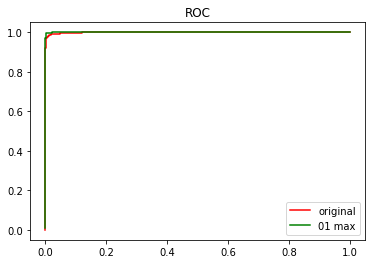

In [59]:
plt.figure()
plt.title("ROC")

# Original
fpr, tpr, thr = sklearn.metrics.roc_curve(y_tr,predict_train_original)
plt.plot(fpr, tpr, color='red', label='original')

# 01 Max
fpr, tpr, thr = sklearn.metrics.roc_curve(y_tr,predict_train_01_max)
plt.plot(fpr, tpr, color='green', label='01 max')

plt.legend()
plt.savefig('./2_ROC.jpg')

### Coefficient plot

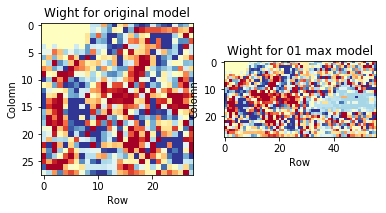

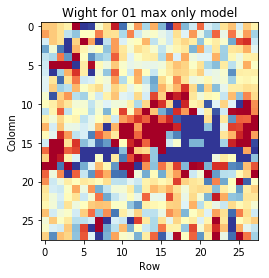

In [81]:
#coef_original
coef_image_original = []
for row in list(range(28)):
    coef_image_original.append(coef_original[28*row+0 : 28*row+28])
    #print(sp_vector[row+0:row+27])
    
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Wight for original model")
plt.xlabel('Row')
plt.ylabel('Colomn')
plt.imshow(coef_image_original, cmap=plt.cm.RdYlBu, vmin=-0.5, vmax=0.5)


#coef_max
coef_image_max = []
for row in list(range(28)):
    coef_image_max.append(np.hstack((coef_01_max[28*row+0:28*row+28],coef_01_max[784 + 28*row+0 : 784 + 28*row+28])))
    #print(sp_vector[row+0:row+27])

plt.subplot(1, 2, 2)
plt.title("Wight for 01 max model")
plt.xlabel('Row')
plt.ylabel('Colomn')
plt.imshow(coef_image_max, cmap=plt.cm.RdYlBu, vmin=-0.5, vmax=0.5)
plt.savefig('./2_weight.jpg')

#coef_max_only
coef_image_max_only = []
for row in list(range(28)):
    coef_image_max_only.append(coef_01_max_only[28*row+0:28*row+28])
    #print(sp_vector[row+0:row+27])

plt.figure()
plt.title("Wight for 01 max only model")
plt.xlabel('Row')
plt.ylabel('Colomn')
plt.imshow(coef_image_max_only, cmap=plt.cm.RdYlBu, vmin=-0.5, vmax=0.5)
plt.savefig('./2_max_only_weight.jpg')

### Original information

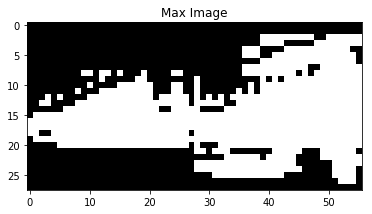

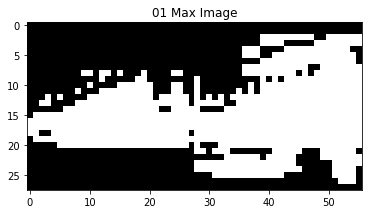

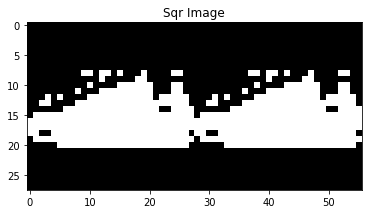

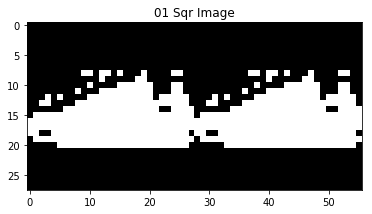

In [75]:
# make max image

vector = x_tr_max_all[0]
image = []
for row in list(range(28)):
    image.append(np.hstack((vector[28*row+0:28*row+28],vector[784 + 28*row+0 : 784 + 28*row+28])))
max_image = image
    
    
plt.figure()
plt.title("Max Image")
plt.imshow(max_image, cmap=plt.cm.gray)
plt.savefig('./2_max_image.jpg')




## make 01 max image

vector = x_tr_01_max_all[0]
image = []
for row in list(range(28)):
    image.append(np.hstack((vector[28*row+0:28*row+28],vector[784 + 28*row+0 : 784 + 28*row+28])))
max_01_image = image
    
    
plt.figure()
plt.title("01 Max Image")
plt.imshow(max_01_image, cmap=plt.cm.gray)
plt.savefig('./2_01_max_image.jpg')




# make square image

vector = x_tr_sqr_all[0]
image = []
for row in list(range(28)):
    image.append(np.hstack((vector[28*row+0:28*row+28],vector[784 + 28*row+0 : 784 + 28*row+28])))
sqr_image = image
    
    
plt.figure()
plt.title("Sqr Image")
plt.imshow(sqr_image, cmap=plt.cm.gray)
plt.savefig('./2_sqr_image.jpg')



# make 01 square image

vector = x_tr_01_sqr_all[0]
image = []
for row in list(range(28)):
    image.append(np.hstack((vector[28*row+0:28*row+28],vector[784 + 28*row+0 : 784 + 28*row+28])))
sqr_01_image = image
    
    
plt.figure()
plt.title("01 Sqr Image")
plt.imshow(sqr_image, cmap=plt.cm.gray)
plt.savefig('./2_01_sqr_image.jpg')